# 1D Viscek flocking model + analysis

In [1]:
import numpy as np
import matplotlib
import random
import matplotlib.pyplot as plt
%matplotlib inline

#source of some snippets https://github.com/ipython-books/cookbook-2nd-code

## Particle density plot

In [2]:
def U(x_row, pos):
    neighbours = []
     
    # two nearest neighbours total 
    if pos == 0:
        neighbours_pos = [1, -1, pos]
    elif pos == len(x_row)-1:
        neighbours_pos = [0, -2, pos]
    else:
        neighbours_pos = [pos-1, pos, pos+1]  
    
    maj_velocity = 0
    for n in neighbours_pos:
        pos_list = x_row[n]
        for idx in range(len(pos_list)):
            maj_velocity += x_row[n][idx] # getting the velocity of every bird that is locates at this position
    
    if maj_velocity > 0:
        velocity_avg = +1
    elif maj_velocity < 0:
        velocity_avg = -1
    else:
        velocity_avg = 0
    
    return velocity_avg

def flock_step(x_row, eta, size):
    new_row = [ [] for _ in range(size) ]

    for pos, birds in enumerate(x_row):
        for bird in (birds):
            #chosen particle
            x_mu = pos  # location of bird
            v_mu = bird   # velocity of bird

            U_x = U(x_row, pos)

            W_u = (1-(1-2*eta)*v_mu*U_x)/2
            if v_mu == 0:
                continue

            if (random.random() < W_u):
                # We flip direction of bird
                if v_mu == -1:
                    vel_to_insert = 1
                    pos_to_insert = x_mu + vel_to_insert

                    # make sure we keep bounds in mind, insert in the beginning
                    if pos_to_insert > (len(x_row)-1):
                        pos_to_insert = 0
                else: # v_mu is 1
                    vel_to_insert = -1
                    pos_to_insert = x_mu + vel_to_insert
                
                new_row[pos_to_insert].append(vel_to_insert)
                
            else:
                # We do not flip, keep original velocity. But we do move the bird
                vel_to_insert = v_mu
                if (pos == (len(x_row)-1)) & (v_mu == 1): # move from right bound to left bound
                    pos_to_insert = 0
                else:
                    pos_to_insert = x_mu + v_mu
                
                new_row[pos_to_insert].append(vel_to_insert)
    
    #print('new row', new_row.shape)
    return new_row


def generate2(size, steps, eta, p):
    #x = np.empty((steps, size), dtype=object)
    x = [ [ [] for _ in range(size) ] for _ in range(steps) ]
    
    velocities  = np.random.choice([-1, 0, 1], size=size, p=[p/2, 1-p, p/2])
    velocities = velocities.tolist()

    for idx, v in enumerate(velocities):
        x[0][idx] = [v]
    
    for i in range(steps - 1):
        x[i + 1] = flock_step(x[i], eta, size)
        
    return x

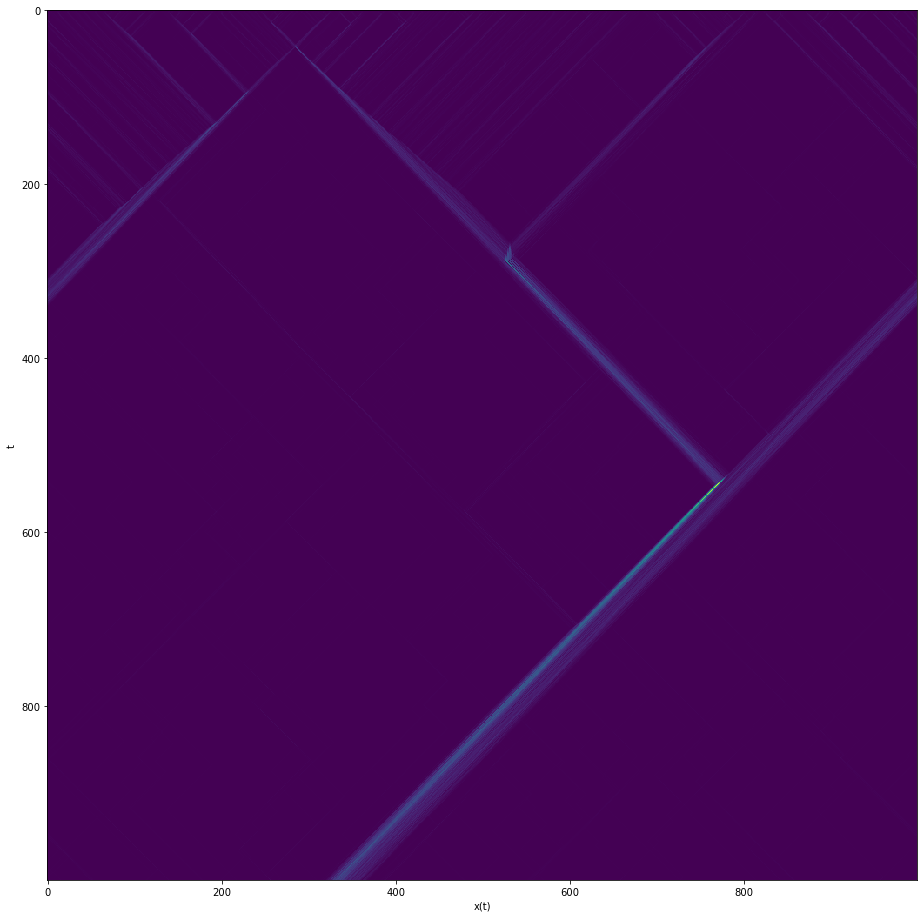

In [6]:
N = 1000
L = 1000
its = 1000
eta = 0.02
p = (N/L)
x = generate2(L, its, eta, p)


def get_density_values(x):
    list_of_density = []
    for gens in x:
        density_row = []
        for pos in gens:
            density_row.append(len(pos))
        list_of_density.append(density_row)
    return list_of_density


density_x = get_density_values(x)

plt.figure(figsize=(20, 16))
plt.ylabel('t')
plt.xlabel('x(t)')
plt.imshow(density_x, interpolation='none')

## Generate density vs avg velocity plot

Text(0, 0.5, 'Avg velocity')

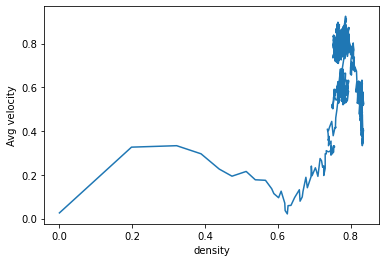

In [4]:
N = 1000
L = 1000
its = 1000
eta = 0.02

end_average_velocity = []
end_average_velocity_mean100_its = []
avg_velocity = []

x = generate2(L, its, eta, p)
for gen in x:
    velocities = []
    for vel in gen:  # only count the non-zero velocities
        if vel == []:
            continue
        if vel != 0:
            velocities.append(int(vel[0]))
            
    avg_velocity.append((abs(sum(velocities)))/len(velocities))

end_average_velocity.append((avg_velocity[-1]))
end_average_velocity_mean100_its.append(np.mean(avg_velocity[-100:]))
    
density_x = get_density_values(x)

density = []

for i in range(len(density_x)):
    dens = density_x[i].count(0)
    density.append(dens/len(density_x))
    
plt.plot(density, avg_velocity)
plt.xlabel("density")
plt.ylabel("Avg velocity")

# density vs iterations for different eta

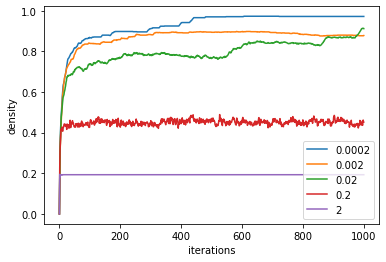

In [5]:
eta_range = [0.0002, 0.002, 0.02, 0.2, 2]

N = 1000
L = 1000
its = 1000
p = (N/L)

density_per_eta = []

for eta in eta_range:
    x = generate2(L, its, eta, p)
    density_x = get_density_values(x)
    density = []
    dens = 0
    for i in range(len(density_x)):
        dens = density_x[i].count(0)
        density.append(dens/len(density_x))
        
    density_per_eta.append(density)
    
labels = ["0.0002", "0.002", "0.02", "0.2", "2"]

for x in range(len(eta_range)):
    plt.plot(np.linspace(0, its, its), density_per_eta[x], label = labels[x])
plt.xlabel("iterations")
plt.ylabel("density")
plt.legend()
plt.show()

## Generate density vs eta plot

In [11]:
eta_range = np.linspace(0.002, 0.5, 20)

N = 1000
L = 1000
its = 1000
p = (N/L)

density_per_eta = []
avg_density = []

for eta in eta_range:
    x = generate2(L, its, eta, p)
    density_x = get_density_values(x)
    density = []
    dens = 0
    for i in range(len(density_x)):
        dens = density_x[i].count(0)
        density.append(dens/len(density_x))
        
    density_per_eta.append(density)
    avg_density.append(np.mean(density[-1]))


plt.plot(eta_range, avg_density)
plt.xlabel("eta")
plt.ylabel("density")
plt.show()

KeyboardInterrupt: 

## Generate avg velocity vs eta plot

Percentage done: 0.1 %
Percentage done: 0.2 %
Percentage done: 0.3 %
Percentage done: 0.4 %
Percentage done: 0.5 %
Percentage done: 0.6 %
Percentage done: 0.7000000000000001 %
Percentage done: 0.8 %
Percentage done: 0.8999999999999999 %
Percentage done: 1.0 %
Percentage done: 1.0999999999999999 %
Percentage done: 1.2 %
Percentage done: 1.3 %
Percentage done: 1.4000000000000001 %
Percentage done: 1.5 %
Percentage done: 1.6 %
Percentage done: 1.7000000000000002 %
Percentage done: 1.7999999999999998 %
Percentage done: 1.9 %
Percentage done: 2.0 %
Percentage done: 2.1 %
Percentage done: 2.1999999999999997 %
Percentage done: 2.3 %
Percentage done: 2.4 %
Percentage done: 2.5 %
Percentage done: 2.6 %
Percentage done: 2.7 %
Percentage done: 2.8000000000000003 %
Percentage done: 2.9000000000000004 %
Percentage done: 3.0 %
Percentage done: 3.1 %
Percentage done: 3.2 %
Percentage done: 3.3000000000000003 %
Percentage done: 3.4000000000000004 %
Percentage done: 3.5000000000000004 %
Percentage done

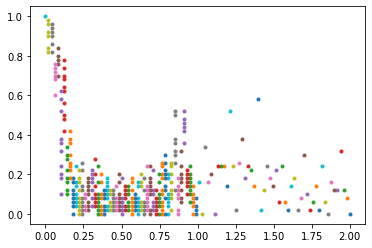

In [31]:
N = 100
L = 100
its = 100
# eta_range = [2.0, 0.2, 0.02, 0.002, 0.0002]
eta_range = np.linspace(2.0, 0, 100)
end_average_velocity = []

rounds = 0
for eta in eta_range:
    p = (N/L)
    x = generate2(L, its, eta, p)
    avg_velocity = []
    #endcap = np.arange(round(N*.9), N)
    #endcap = list(endcap)
    for gen in x:
        velocities = []
        #print(gen)
        for vel in gen:  # only count the non-zero velocities
            if vel == []:
                continue
            if vel != 0:
                for v in vel:
                    velocities.append(int(v)) # old: velocities.append(int(vel[0]))
        avg_velocity.append((abs(sum(velocities)))/len(velocities))
    u = np.unique(avg_velocity[-10:])
    eta = eta*np.ones(len(u))
    plt.plot(eta, u, '.')
    end_average_velocity.append(np.mean(avg_velocity[-100:]))
    rounds += 1
    print("Percentage done:", (rounds/1000*100), '%')

plt.show()


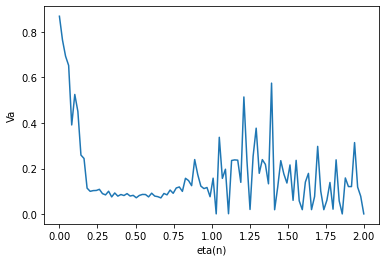

In [32]:
plt.plot(eta_range, end_average_velocity)
plt.xlabel('eta(n)')
#plt.xticks((0.0002, 0.02, 0.02))
plt.ylabel('Va')
plt.show()


### Calculate average final velocity

In [14]:
N = 250
L = 250
its = 1000
eta_range = np.linspace(1.0, 0, 100)
end_average_velocity = []
n_sims = 100

rounds = 0
for sim in range(n_sims):
    end_avg = []
    for eta in eta_range:
        p = (N/L)
        x = generate2(L, its, eta, p)
        avg_velocity = []
        for gen in x:
            velocities = []
            #print(gen)
            for vel in gen:  # only count the non-zero velocities
                if vel == []:
                    continue
                if vel != 0:
                    for v in vel:
                        velocities.append(int(v)) # old: velocities.append(int(vel[0]))
            avg_velocity.append(sum(velocities)/len(velocities))
        u = np.unique(avg_velocity[-10:])
        eta = eta*np.ones(len(u))
        end_avg.append(np.mean(avg_velocity[-100:]))
        rounds += 1
    end_average_velocity.append(end_avg)
    print("Percentage done:", ((sim+1)/n_sims*100), '%')


Percentage done: 1.0 %
Percentage done: 2.0 %
Percentage done: 3.0 %
Percentage done: 4.0 %
Percentage done: 5.0 %
Percentage done: 6.0 %
Percentage done: 7.000000000000001 %
Percentage done: 8.0 %
Percentage done: 9.0 %
Percentage done: 10.0 %
Percentage done: 11.0 %
Percentage done: 12.0 %
Percentage done: 13.0 %
Percentage done: 14.000000000000002 %
Percentage done: 15.0 %
Percentage done: 16.0 %
Percentage done: 17.0 %
Percentage done: 18.0 %
Percentage done: 19.0 %
Percentage done: 20.0 %
Percentage done: 21.0 %
Percentage done: 22.0 %
Percentage done: 23.0 %
Percentage done: 24.0 %
Percentage done: 25.0 %
Percentage done: 26.0 %
Percentage done: 27.0 %
Percentage done: 28.000000000000004 %
Percentage done: 28.999999999999996 %
Percentage done: 30.0 %
Percentage done: 31.0 %
Percentage done: 32.0 %
Percentage done: 33.0 %
Percentage done: 34.0 %
Percentage done: 35.0 %
Percentage done: 36.0 %
Percentage done: 37.0 %
Percentage done: 38.0 %
Percentage done: 39.0 %
Percentage done: 

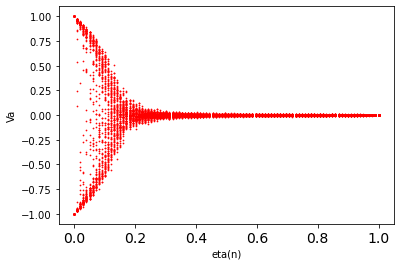

In [16]:
for i in end_average_velocity:
    plt.scatter(eta_range, i, c='r', marker='.', s=2)
    plt.xlabel('eta(n)')
    plt.ylabel('Va')
    plt.xticks(fontsize=14)
    plt.xticks(fontsize=14)

plt.savefig('bifurcation.jpg')
plt.show()

## Average plot

In [18]:
N = 1000
L = 1000
its = 1000
eta_range = np.linspace(2.0, 0, 20)
end_average_velocity_avg = []
n_sims = 10

rounds = 0
for sim in range(n_sims):
    end_avg = []
    for eta in eta_range:
        p = (N/L)
        x = generate2(L, its, eta, p)
        avg_velocity = []
        for gen in x:
            velocities = []
            #print(gen)
            for vel in gen:  # only count the non-zero velocities
                if vel == []:
                    continue
                if vel != 0:
                    for v in vel:
                        velocities.append(int(v)) # old: velocities.append(int(vel[0]))
            avg_velocity.append(abs(sum(velocities))/len(velocities))
        u = np.unique(avg_velocity[-10:])
        eta = eta*np.ones(len(u))
        end_avg.append(np.mean(avg_velocity[-100:]))
        rounds += 1
    end_average_velocity_avg.append(end_avg)
    print("Percentage done:", ((sim+1)/n_sims*100), '%')

Percentage done: 10.0 %
Percentage done: 20.0 %
Percentage done: 30.0 %
Percentage done: 40.0 %
Percentage done: 50.0 %
Percentage done: 60.0 %
Percentage done: 70.0 %
Percentage done: 80.0 %
Percentage done: 90.0 %
Percentage done: 100.0 %


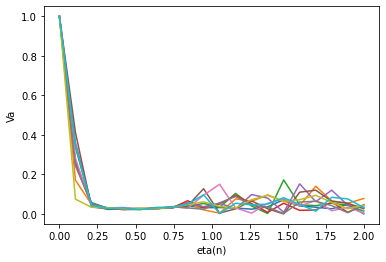

In [19]:
# Plot average 
# print(end_average_velocity_avg)


for idx, i in enumerate(end_average_velocity_avg):
    plt.xlabel('eta(n)')
    plt.ylabel('Va')
    plt.plot(eta_range, i)
    
        
        
        
plt.show()

## Scale invariance plot

In [9]:
eta_range = [0.2, 0.02, 0.002, 0.0002, 0.00002]
n_l_range = [10, 100, 1000, 10000]
its = 1000
end_avg = {
    '10': [], 
    '100': [],
    '1000': [],
    '10000': []
}
no_sim = 10

for nl in n_l_range:
    p = (nl/nl)
    nl_list = []
    for eta in eta_range:
        avg_sim = []
        for sim in range(no_sim):  # run every setting no_sim times
            x = generate2(nl, its, eta, p)
            avg_velocity = []
            for gen in x:
                velocities = []
                for vel in gen:  # only count the non-zero velocities
                    if vel == []:
                        continue
                    if vel != 0:
                        for v in vel:
                            velocities.append(int(v)) # old: velocities.append(int(vel[0]))

                            # We take absolute value so we can make the log plot
                avg_velocity.append(abs(sum(velocities))/len(velocities)) # average velocities of a gen
            avg_sim.append(np.mean(avg_velocity[-100:]))
        nl_list.append(sum(avg_sim)/len(avg_sim))
        print('eta %s, nl %s'%(eta, nl))
    end_avg['%s'%nl] = nl_list

eta 0.2, nl 10
eta 0.02, nl 10
eta 0.002, nl 10
eta 0.0002, nl 10
eta 2e-05, nl 10
eta 0.2, nl 100
eta 0.02, nl 100
eta 0.002, nl 100
eta 0.0002, nl 100
eta 2e-05, nl 100
eta 0.2, nl 1000
eta 0.02, nl 1000
eta 0.002, nl 1000
eta 0.0002, nl 1000
eta 2e-05, nl 1000
eta 0.2, nl 10000
eta 0.02, nl 10000
eta 0.002, nl 10000
eta 0.0002, nl 10000
eta 2e-05, nl 10000


{'10': [0.40420000000000006, 0.9354000000000001, 0.9932000000000001, 1.0, 1.0], '100': [0.14486000000000002, 0.9041199999999998, 0.9909600000000001, 0.99976, 0.9999600000000001], '1000': [0.047060000000000005, 0.769258, 0.991358, 0.9990120000000001, 0.999774], '10000': [0.013096800000000002, 0.32141679999999995, 0.3584762, 0.2398708, 0.3049956]}
yaxis: 1 - Absolute average velocity, so how close do we get to 1??
xaxis: log scaled 


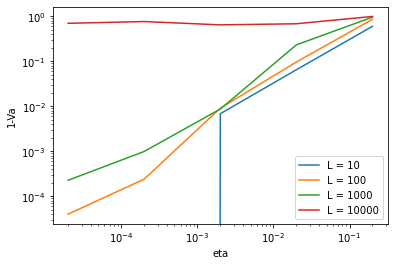

In [13]:
print(end_avg)
for k in end_avg.keys():
    velocity_change = []
    
    for e in end_avg[k]:
        velocity_change.append(1-e)
    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel('eta')
    plt.ylabel('1-Va')
    plt.plot(eta_range, velocity_change, label="L = %s"%k)

plt.legend()
plt.savefig('scale_invariance.jpg')
print('yaxis: 1 - Absolute average velocity, so how close do we get to 1??')
print('xaxis: log scaled ')

## Generate plot for U vs eta for different L sizes to obtain critical value of eta (n)

##### note that p cannot be > 1, so N is set equal to L

In [19]:
L_range = [500, 750, 1000, 2000]
eta_range = np.linspace(0.002, 0.25, 10)
#N = 500
U_per_L = []
its = 1000

for L in L_range:
    U_per_eta = []
    for eta in eta_range:
        end_average_velocity = 0
        N = L
        p = (N/L)
        x = generate2(L, its, eta, p)
        avg_velocity1 = []
        avg_velocity2 = []
        #endcap = np.arange(round(N*.9), N)
        #endcap = list(endcap)
        for gen in x:
            velocities = []
            #print(gen)
            for vel in gen:  # only count the non-zero velocities
                if vel == []:
                    continue
                if vel != 0:
                    velocities.append(int(vel[0]))
            avg_velocity1.append((abs(sum(velocities))) ** 4 / len(velocities))
            avg_velocity2.append((abs(sum(velocities))) ** 2 / len(velocities))
        end_average_velocity1 = np.mean(avg_velocity1[-100:])
        end_average_velocity2 = np.mean(avg_velocity2[-100:])
        U_per_eta.append(1- (end_average_velocity1 / (3 * (end_average_velocity2))))
    
    U_per_L.append(U_per_eta)

KeyboardInterrupt: 

In [ ]:
labels = ['L = 500', 'L = 750', 'L = 1000', 'L = 2000']

for x in range(len(L_range)):
    plt.plot(eta_range, U_per_L[x], label = labels[x])

plt.xlabel('eta')
plt.ylabel('U')
plt.legend()
plt.show()